In [1]:
__name__

'__main__'

In [2]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bottleneck
import statsmodels.api as sm
import openpyxl
import xlrd
import statistics
import random as rd
import seaborn as sns

In [3]:
team2_survey_location = "/Users/Perry/Google Drive File Stream/My Drive/Commerce/Fall 20/BUSA 521/Phase 3/Fall 2020 - Team 2 - Consumer Intention toward Online Grocery Shopping_November 20, 2020_01.17.csv"

In [4]:
# Read the file

team2_raw_data = pd.read_csv(filepath_or_buffer=team2_survey_location, sep=",")

In [5]:
# Preview the raw data

team2 = team2_raw_data
team2_raw_data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,The groceries bought online meet my expectations,Online grocery shopping helps me save time,I am satisfied with the time between placement...,Online grocery shopping services are accessibl...,It is easy to get help from customer service w...,Online grocery shopping helps me save money,"On average, the products that I buy using onli...",I am most likely to find better deals on groce...,The COVID-19 pandemic had an impact on my inte...,I intent to keep buy groceries using online se...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID30""}","{""ImportId"":""QID18""}","{""ImportId"":""QID31""}","{""ImportId"":""QID26""}","{""ImportId"":""QID27""}","{""ImportId"":""QID19""}","{""ImportId"":""QID21""}","{""ImportId"":""QID24""}","{""ImportId"":""QID32""}","{""ImportId"":""QID33""}"
2,11/9/20 23:53,11/9/20 23:53,Survey Preview,NaN,100,13,TRUE,11/9/20 23:53,R_1ps0VLIKs4vHchb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/12/20 15:39,11/12/20 15:42,IP Address,75.17.224.126,100,173,TRUE,11/12/20 15:42,R_dmYDTvdWhjBFl97,NaN,...,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
4,11/12/20 15:43,11/12/20 15:46,IP Address,70.120.201.141,100,213,TRUE,11/12/20 15:46,R_2THJMZGTYxnb90v,NaN,...,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree


In [6]:
# Preview the raw data

team2 = team2_raw_data
team2_raw_data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,The groceries bought online meet my expectations,Online grocery shopping helps me save time,I am satisfied with the time between placement...,Online grocery shopping services are accessibl...,It is easy to get help from customer service w...,Online grocery shopping helps me save money,"On average, the products that I buy using onli...",I am most likely to find better deals on groce...,The COVID-19 pandemic had an impact on my inte...,I intent to keep buy groceries using online se...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID30""}","{""ImportId"":""QID18""}","{""ImportId"":""QID31""}","{""ImportId"":""QID26""}","{""ImportId"":""QID27""}","{""ImportId"":""QID19""}","{""ImportId"":""QID21""}","{""ImportId"":""QID24""}","{""ImportId"":""QID32""}","{""ImportId"":""QID33""}"
2,11/9/20 23:53,11/9/20 23:53,Survey Preview,NaN,100,13,TRUE,11/9/20 23:53,R_1ps0VLIKs4vHchb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/12/20 15:39,11/12/20 15:42,IP Address,75.17.224.126,100,173,TRUE,11/12/20 15:42,R_dmYDTvdWhjBFl97,NaN,...,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
4,11/12/20 15:43,11/12/20 15:46,IP Address,70.120.201.141,100,213,TRUE,11/12/20 15:46,R_2THJMZGTYxnb90v,NaN,...,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree


In [7]:
# Filter the data based on "Finished" column (Finish the survery or not) 
# and "Q1" column (Have you shopped online grocery?)

mask1 = team2["Finished"] == "TRUE"
mask2 = team2["Q1"] == "Yes"

team2 = team2[mask1 & mask2]

In [8]:
# Preview the processed data by the first 20 rows

team2.head(20)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
3,11/12/20 15:39,11/12/20 15:42,IP Address,75.17.224.126,100,173,TRUE,11/12/20 15:42,R_dmYDTvdWhjBFl97,NaN,...,Neither agree nor disagree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Agree,Somewhat agree
4,11/12/20 15:43,11/12/20 15:46,IP Address,70.120.201.141,100,213,TRUE,11/12/20 15:46,R_2THJMZGTYxnb90v,NaN,...,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Agree
5,11/12/20 15:49,11/12/20 15:52,IP Address,104.222.24.129,100,178,TRUE,11/12/20 15:52,R_21sMs2V1PncBlWh,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
6,11/12/20 15:49,11/12/20 15:56,IP Address,76.116.64.6,100,382,TRUE,11/12/20 15:56,R_3QJKXQgKXtVzn2O,NaN,...,Strongly agree,Agree,Agree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,Strongly agree
7,11/12/20 15:52,11/12/20 15:56,IP Address,68.252.126.244,100,232,TRUE,11/12/20 15:56,R_1InibcIfVqdNdAM,NaN,...,Somewhat agree,Agree,Agree,Agree,Somewhat agree,Somewhat agree,Agree,Somewhat agree,Agree,Agree
8,11/12/20 15:51,11/12/20 15:57,IP Address,101.85.124.69,100,322,TRUE,11/12/20 15:57,R_1pFMIrce5LXNm1G,NaN,...,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Agree
9,11/12/20 15:56,11/12/20 16:02,IP Address,174.225.131.75,100,359,TRUE,11/12/20 16:02,R_2CCCx3T3A5VNU7o,NaN,...,Somewhat disagree,Agree,Disagree,Agree,Somewhat disagree,Disagree,Strongly disagree,Disagree,Agree,Somewhat agree
11,11/12/20 16:00,11/12/20 16:04,IP Address,188.74.64.210,100,255,TRUE,11/12/20 16:04,R_1CBjEtzbU0TVnEI,NaN,...,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Somewhat agree,Agree,Agree
12,11/12/20 18:08,11/12/20 18:16,IP Address,75.138.176.171,100,454,TRUE,11/12/20 18:16,R_27pcexVZhX3sNlo,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Disagree,Strongly agree,Somewhat agree
13,11/12/20 18:57,11/12/20 19:01,IP Address,174.197.66.217,100,259,TRUE,11/12/20 19:01,R_pFxOAWqll3JFc1r,NaN,...,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree,Agree,Agree,Somewhat agree,Somewhat disagree,Agree,Agree


# Insights

Text(0, 0.5, 'Time Spent(second)')

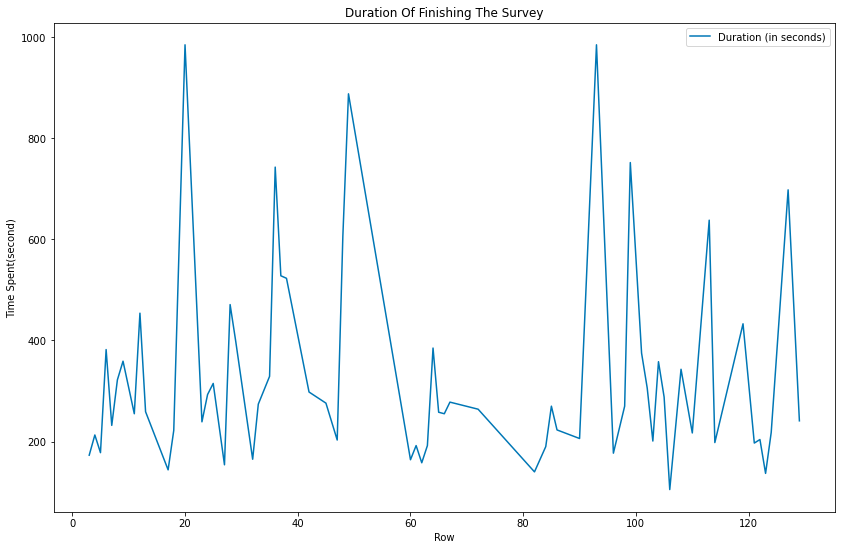

In [9]:
# The average time of finishing the survey is around 330 seconds that is equal to 5.5 minitues

team2.loc[:, ["Duration (in seconds)"]].astype(dtype="int64").mean()
team2.loc[:, ["Duration (in seconds)"]].astype(dtype="int64").plot(kind="line", figsize=(14, 9), color="#0077b6")

plt.title(label="Duration Of Finishing The Survey")
plt.xlabel(xlabel="Row")
plt.ylabel(ylabel="Time Spent(second)")

In [10]:
# 5.5 minitues

team2.loc[:, ["Duration (in seconds)"]].astype(dtype="int64").mean() / 60

Duration (in seconds)    5.48641
dtype: float64

Text(0, 0.5, 'Count')

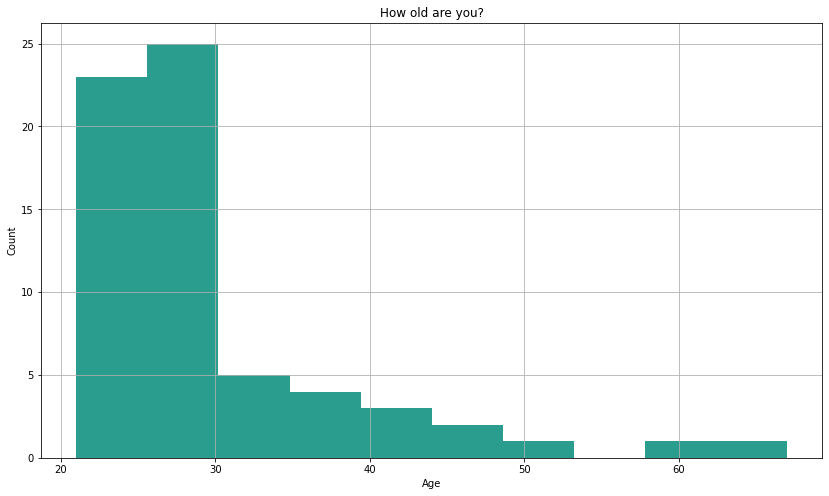

In [11]:
# Question 2: How old are you?
# Most responders are young adults between 20 to 30 years old. 
# Surprisingly, we got some responders who are older than 60 years old

team2["Q2"].astype(dtype="int32").hist(figsize=(14, 8), grid=True, color="#2a9d8f")

plt.title(label="How old are you?")
plt.xlabel(xlabel="Age")
plt.ylabel(ylabel="Count")

Text(0, 0.5, 'Percent')

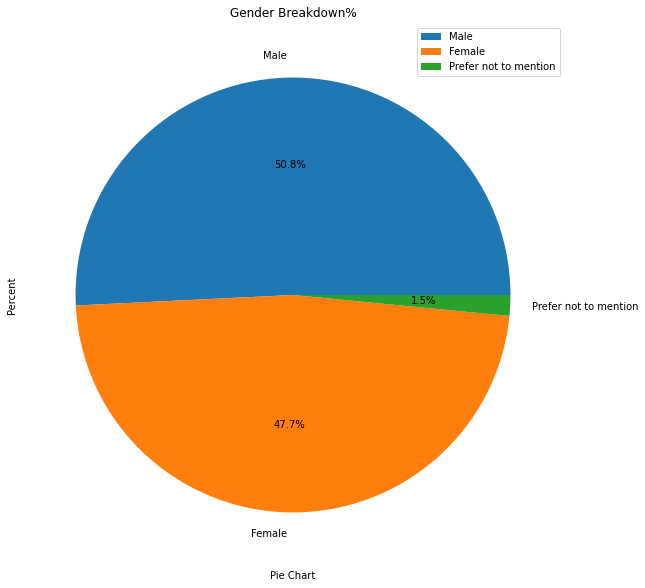

In [12]:
# Question 3: What is your gender?
# The number of Male and Female responders are almost same

dic = dict(team2["Q3"].astype(dtype="category").value_counts())
df = pd.DataFrame(data={"Number":[dic["Male"], dic["Female"], dic["Prefer not to mention"]]},
                  index=["Male", "Female", "Prefer not to mention"])

plot = df.plot.pie(y="Number", autopct='%1.1f%%', figsize=(14, 10), )
plt.title(label="Gender Breakdown%")
plt.xlabel(xlabel="Pie Chart")
plt.ylabel(ylabel="Percent")

Text(0, 0.5, 'Count')

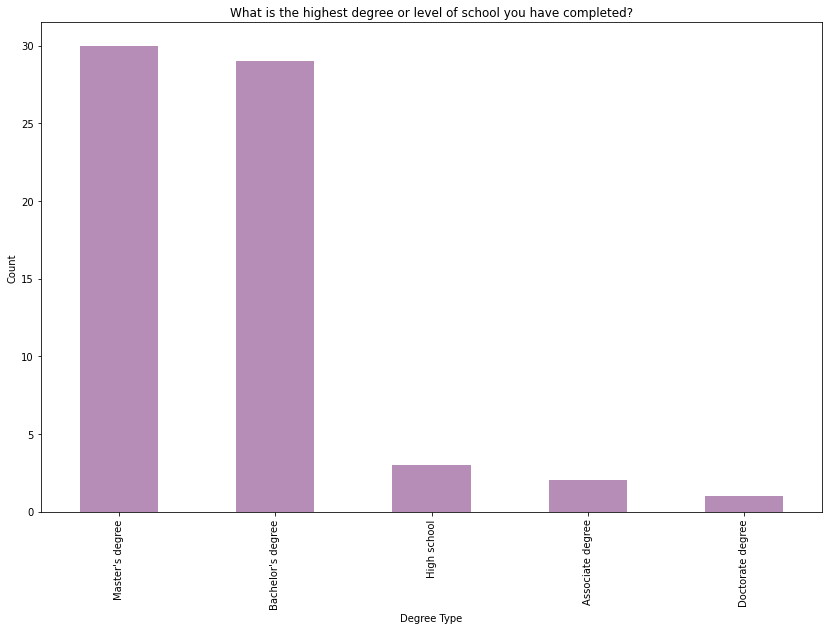

In [13]:
# Question 4: What is the highest degree or level of school you have completed?
# Most of responders are holding master and bachelor's degree.


team2["Q4"].value_counts().plot(kind="bar", figsize=(14, 9), color="#b58db6")
plt.title(label="What is the highest degree or level of school you have completed?")
plt.xlabel(xlabel="Degree Type")
plt.ylabel(ylabel="Count")

Text(0, 0.5, 'Employment Type')

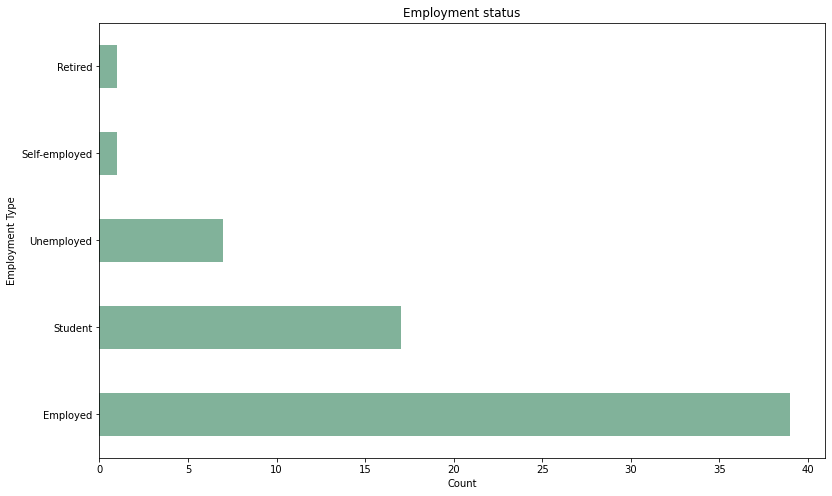

In [14]:
# Question 5: Your Employment Status.
# Most of responders are Employed and we got a small sample who have retired

team2["Q5"].value_counts().plot(kind="barh", figsize=(13, 8), color="#81b29a")
plt.title(label="Employment status")
plt.xlabel(xlabel="Count")
plt.ylabel(ylabel="Employment Type")

<AxesSubplot:>

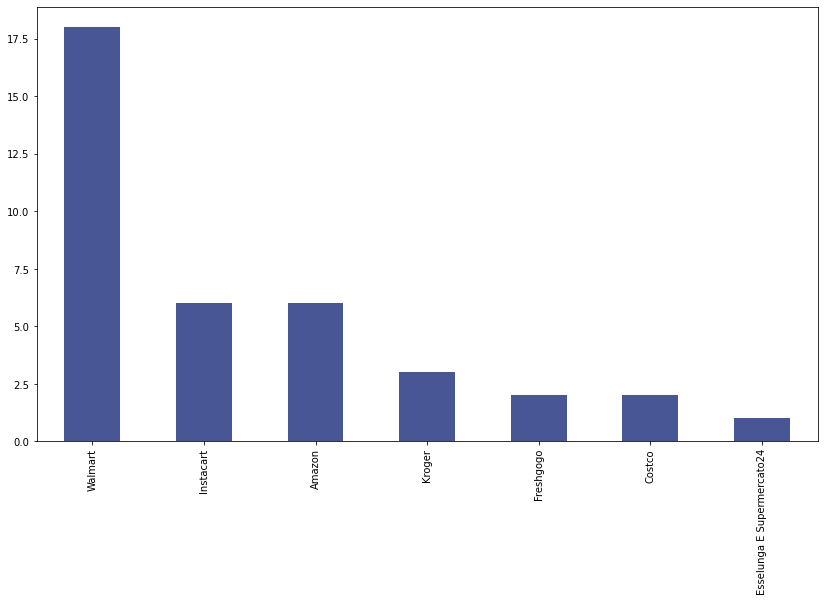

In [15]:
# Question 6: What online shopping service do you prefer for your grocery shopping? 
# Not surprisingly, Walmart are still dominating the industry of online grocery shopping.

team2["Q6"].str.upper().str.strip().str.title().value_counts(ascending=False).head(7).plot(kind="bar", figsize=(14, 8), color='#485696')

Text(0, 0.5, 'Rating Score')

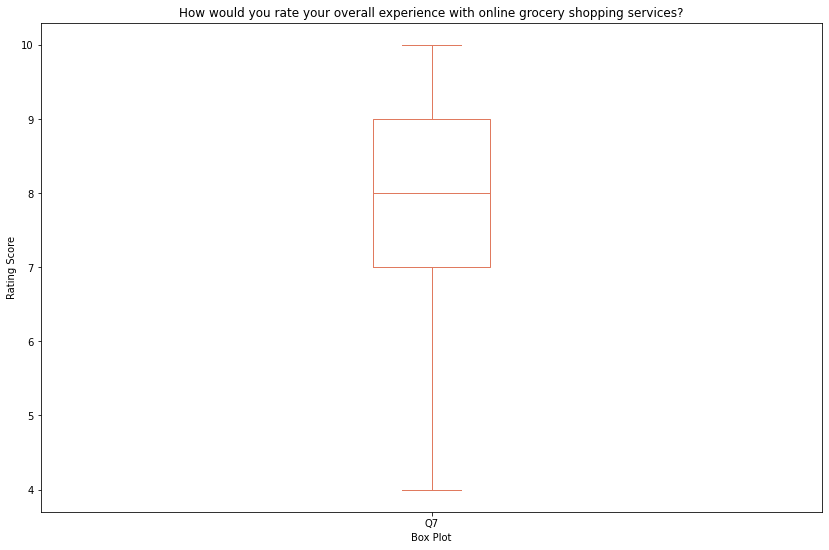

In [16]:
# Question 7: How would you rate your overall experience with online grocery shopping services?
# Most responders have positive attitides about our survey
# The median of rate for this survey is 8 out of 10

# plt.boxplot(team2["Q7"].astype(dtype="int32"), labels=" ")
team2.loc[:, ["Q7"]].astype("int32").boxplot(grid=False, figsize=(14, 9), color="#e07a5f")
plt.title(label="How would you rate your overall experience with online grocery shopping services?")
plt.xlabel(xlabel="Box Plot")
plt.ylabel(ylabel="Rating Score")